# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [15]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [16]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [17]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [18]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [19]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
#建立模型

In [22]:
from keras.models import Sequential
from keras.layers import Dense

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構中間層
model.add(Dense(units=512, 
#                 input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=512, 
#                 input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 600,330
Trainable params: 600,330
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9321 - val_loss: 0.1259 - val_accuracy: 0.9630
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0992 - accuracy: 0.9703 - val_loss: 0.1105 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.1115 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.1021 - val_accuracy: 0.9718
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.1157 - val_accuracy: 0.9678
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.1001 - val_accuracy: 0.9769
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.1233 - val_accuracy:

# 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

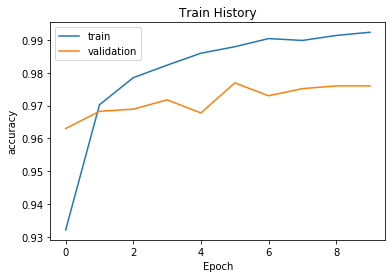

In [27]:
show_train_history(train_history,'accuracy','val_accuracy')

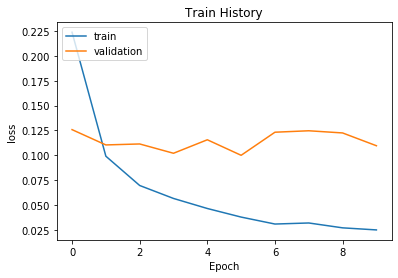

In [28]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 811us/step - loss: 0.0994 - accuracy: 0.9786

accuracy= 0.978600025177002


再新增兩層下準確度反而下降了